# Circular Doubly Linked List (CDLL) in Python
A **Circular Doubly Linked List** is a type of linked list where:
- Each node has `value`, `next`, and `prev` pointers.
- The last node points back to the first node (`head`) and vice versa, forming a circle.
- Supports operations like append, prepend, traversal, insertion, deletion, search, etc.


In [47]:
# Node class for Circular Doubly Linked List
class Node:
    def __init__(self, value):
        self.value = value
        self.next = Node
        self.prev = None


### Explanation:
- `Node` represents each element in the CDLL.
- `value`: stores data.
- `next`: pointer to the next node.
- `prev`: pointer to the previous node.


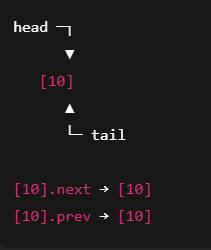

In [48]:
# Circular Doubly Linked List class
class CircularDoublyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0
    # Optional constructor to create a CDLL with a single node
    def constructor2(self, value):
        new_node = Node(value) #10
        new_node.next = new_node
        new_node.prev = new_node

        self.head = new_node
        self.tail = new_node
        self.length = 1 

## __str__()

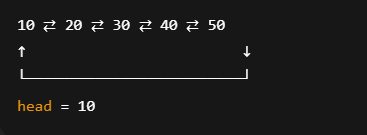

| Iteration | currentNode | value | result (before)                  | result (after adding value)        | currentNode.next | `currentNode == head`? | Action        |
| --------- | ----------- | ----- | -------------------------------- | ---------------------------------- | ---------------- | ---------------------- | ------------- |
| 1         | [10]        | 10    | `""`                             | `"10"`                             | [20]             | ❌                      | add `" <-> "` |
| 2         | [20]        | 20    | `"10 <-> "`                      | `"10 <-> 20"`                      | [30]             | ❌                      | add `" <-> "` |
| 3         | [30]        | 30    | `"10 <-> 20 <-> "`               | `"10 <-> 20 <-> 30"`               | [40]             | ❌                      | add `" <-> "` |
| 4         | [40]        | 40    | `"10 <-> 20 <-> 30 <-> "`        | `"10 <-> 20 <-> 30 <-> 40"`        | [50]             | ❌                      | add `" <-> "` |
| 5         | [50]        | 50    | `"10 <-> 20 <-> 30 <-> 40 <-> "` | `"10 <-> 20 <-> 30 <-> 40 <-> 50"` | **[10]**         | ✅                      | **BREAK**     |


In [49]:
# String representation of CDLL
def __str__(self):
    result = ''
    currentNode = self.head
    while currentNode: #10,20
        result +=str(currentNode.value) #"10 20 30 40 50"
        currentNode = currentNode.next #20, 30,40 50 10
        if currentNode == self.head: break
        result += '<->' #"10<->20<->30<->40<->50"
    return result   

### Explanation:
- `head`: first node.
- `tail`: last node.
- `length`: number of nodes.
- `__str__`: prints all node values in `value1 <-> value2 <-> ...` format.
- `constructor2(value)`: initializes CDLL with one node (optional helper).


## Append and Prepend


Appending [30] to [10]⇄[20]⇄[10]:

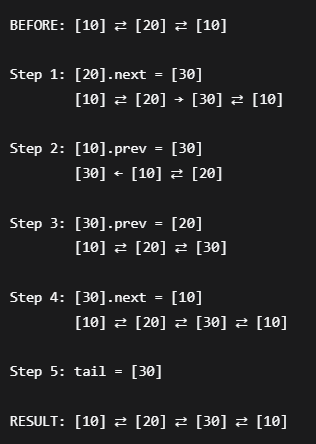

In [50]:
# Append and Prepend
def append(self, value):
    new_node = Node(value)
    if self.length == 0:
        self.head = new_node #10
        self.tail = new_node #10
        new_node.prev = self.tail #10.prev =10
        new_node.next = new_node #10.next = 10

    else:  
        self.tail.next = new_node  
        #20.next = 30
        self.head.prev = new_node
        #10.prev = 30
        new_node.prev = self.tail
        #30.prev = 20
        new_node.next = self.head
        #30.next =10
        self.tail = new_node #30
    self.length +=1    
CircularDoublyLinkedList.append = append


Prepending [10] to [20]⇄[30]⇄[20]:


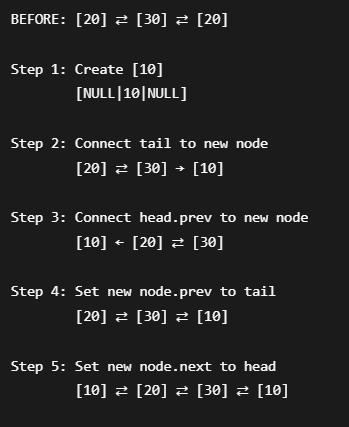

In [51]:
def prepend(self, value):
    new_node = Node(value) #10
    if self.length == 0:
        self.head = new_node #10
        self.tail = new_node #10
        new_node.prev = self.tail #10.prev =10
        new_node.next = new_node #10.next = 10
    else:   
        self.tail.next = new_node  
        #30.next = 10
        self.head.prev = new_node
        #20.prev = 10
        new_node.prev = self.tail
        #10.prev = 30
        new_node.next = self.head
        #10.next =20
        self.head = new_node #10
    self.length +=1 
CircularDoublyLinkedList.prepend = prepend

### Explanation:
- **append(value)**: adds a node at the end.
  - Empty list → `head` and `tail` point to the new node, node points to itself.
  - Otherwise → update `tail.next`, `head.prev`, new node pointers, and `tail`.
- **prepend(value)**: adds a node at the start.
  - Similar logic, but updates `head` instead of `tail`.


## Traverse and Reverse Traverse


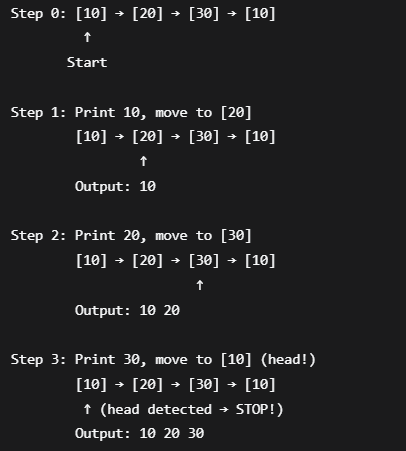

In [52]:
# Traverse and Reverse Traverse
def traverse(self):
    currentNode = self.head #10
    while currentNode:
        print(currentNode.value, end = ' ') #"10, 20 30 "
        currentNode = currentNode.next #20,30,
        if currentNode == self.head:
            break 
    print()
CircularDoublyLinkedList.traverse = traverse



## reverse_traverse()

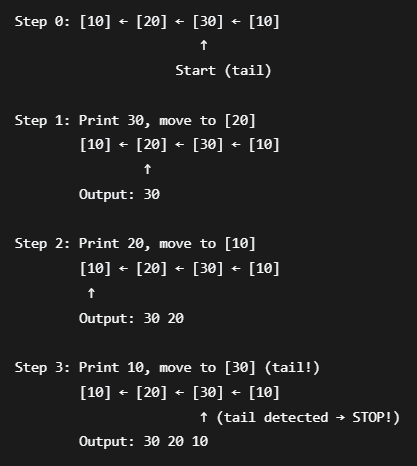

In [53]:

def reverse_traverse(self):
    currentNode = self.tail #30
    while currentNode: 
        print(currentNode.value, end = ' ') #"30 20 10"
        currentNode = currentNode.prev #20,10, 
        if currentNode == self.head:
            break 
    print() 

CircularDoublyLinkedList.reverse_traverse = reverse_traverse


### Explanation:
- **traverse()**: prints nodes from head → tail.
- **reverse_traverse()**: prints nodes from tail → head.
- Stops when it completes one full circle.


## Search, Get, and Set Value

target = 30

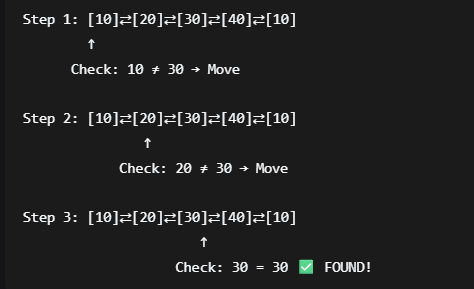

In [54]:
# Search, Get, and Set Value
def search(self, target):
    current = self.head #10
    while current:
        if current.value == target: #10==30, 20==30, 30==30
            return True
        current = current.next #20,30
        if current == self.head: #20==10, 30==10
            break
    return False    
CircularDoublyLinkedList.search = search

## get()

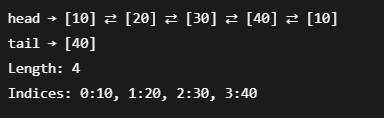

get(2)

| Step  | current | count | count < 2? | Action                  |
| ----- | ------- | ----- | ---------- | ----------------------- |
| Start | [10]    | 0     | True       | Move to [20], count = 1 |
| 1     | [20]    | 1     | True       | Move to [30], count = 2 |
| 2     | [30]    | 2     | False      | **Return [30]**         |


In [55]:
def get(self, index):
    # invalid index
    if index < 0 or index >= self.length:
        return None
    
    current = self.head #10
    count = 0
    while count < index: #0<2, 1<2
        current = current.next #20, 30
        count +=1 #1,2
    return current    
CircularDoublyLinkedList.get = get


## set_value(1,88)

| Step | Code                 | Action                | Variables     | List State                         |
| ---- | -------------------- | --------------------- | ------------- | ---------------------------------- |
| 1    | `temp = self.get(1)` | Fetch node at index 1 | `temp → [20]` | `[10] ⇄ [20] ⇄ [30] ⇄ [40] ⇄ [10]` |
| 2    | `if temp:`           | Node exists           | `True`        | No change                          |
| 3    | `temp.value = 88`    | Update node value     | `[20] → [88]` | `[10] ⇄ [88] ⇄ [30] ⇄ [40] ⇄ [10]` |
| 4    | `return True`        | Update successful     | —             | Updated list                       |


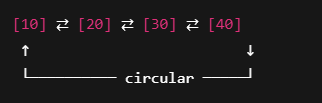

In [56]:
def set_value(self, index, value):
    temp = self.get(index) #1
    if temp:
        temp.value = value
        #temp.20 = 88
        return True
    return False
CircularDoublyLinkedList.set_value = set_value


### Explanation:
- **search(target)**: checks if `target` exists in CDLL.
- **get(index)**: returns the node at given index (optimized traversal from head or tail).
- **set_value(index, value)**: updates node’s value at a specific index.


## Insert, Pop, Remove, Delete All


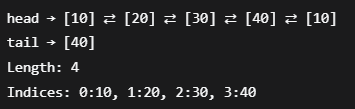

insert(2, 25)

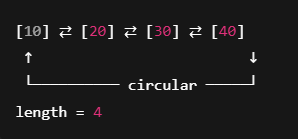

| Step | Code                            | Action            | Visual            | List State                      |
| ---- | ------------------------------- | ----------------- | ----------------- | ------------------------------- |
| 1    | `if index == 0:`                | Check             | ❌ False           | `[10]⇄[20]⇄[30]⇄[40]⇄[10]`      |
| 2    | `if index == self.length:`      | Check             | ❌ False           | Same                            |
| 3    | `new_node = Node(25)`           | Create node       | `[25]`            | Not linked yet                  |
| 4    | `tempNode = self.get(1)`        | Get previous node | `tempNode → [20]` | Same                            |
| 5    | `new_node.next = tempNode.next` | Forward link      | `[25] → [30]`     | `[10]⇄[20]→[30]⇄[40]`           |
| 6    | `new_node.prev = tempNode`      | Backward link     | `[20] ⇄ [25]`     | `[10]⇄[20]⇄[25]→[30]`           |
| 7    | `tempNode.next.prev = new_node` | Fix back link     | `[25] ⇄ [30]`     | `[10]⇄[20]⇄[25]⇄[30]⇄[40]`      |
| 8    | `tempNode.next = new_node`      | Final insert      | `[20] ⇄ [25]`     | `[10]⇄[20]⇄[25]⇄[30]⇄[40]⇄[10]` |
| 9    | `self.length += 1`              | Update length     | `length = 5`      | ✅ Complete                      |


In [57]:
def insert(self, index, value):
    if index == 0:
        self.prepend(value)
    if index == self.length:
        self.append(value)

    new_node = Node(value)    #25
    tempNode = self.get(index -1) #2-1 =1
    new_node.next = tempNode.next
    #25.next =30
    new_node.prev = tempNode
    #25.prev =20
    tempNode.next.prev = new_node
    #30.prev =25
    tempNode.next = new_node
    #20.next = 25
    self.length += 1
CircularDoublyLinkedList.insert = insert

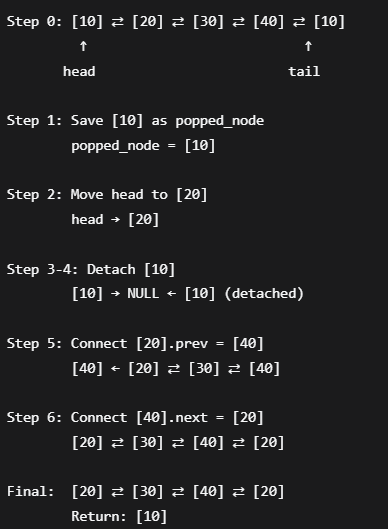

In [58]:
def pop_first(self):
    if self.length == 0: return None
    popped_node = self.head #10
    if self.length == 1:
        self.head = None
        self.tail = None
    else:
        self.head = self.head.next #20
        popped_node.next =None
        popped_node.prev =None
        self.head.prev = self.tail
        #20.prev = 40
        self.tail.next = self.head
        #40.next = 20
    self.length -= 1
    return popped_node    
CircularDoublyLinkedList.pop_first = pop_first

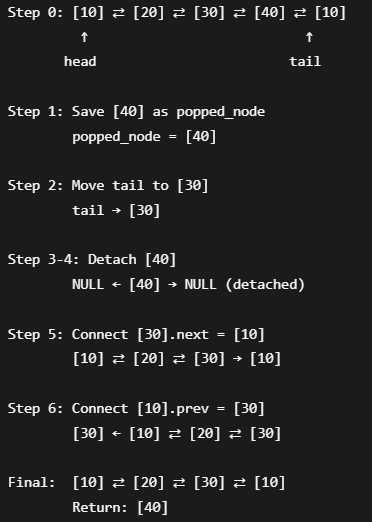

In [59]:
def pop(self):
    if self.length == 0: return None
    popped_node = self.tail #40
    if self.length == 1:
        self.head = None
        self.tail = None
    else:
        self.tail = self.tail.prev #30
        popped_node.prev =None
        popped_node.next =None
        self.tail.next = self.head
        #30.next = 10
        self.head.prev = self.tail
        #10.prev = 30
    self.length -= 1
    return popped_node    
CircularDoublyLinkedList.pop = pop

## Remove

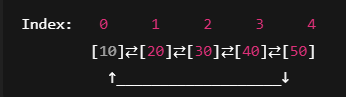

head = [10], tail = [50], length = 5

remove(2) (remove value 30)

| Step | Code                                       | Action          | Visual               |
| ---- | ------------------------------------------ | --------------- | -------------------- |
| 1    | `if index == 0`                            | Check           | ❌                    |
| 2    | `if index == length-1`                     | Check           | ❌                    |
| 3    | `popped_node = self.get(2)`                | Get node        | `popped_node → [30]` |
| 4    | `popped_node.prev.next = popped_node.next` | Bypass forward  | `[20].next → [40]`   |
| 5    | `popped_node.next.prev = popped_node.prev` | Bypass backward | `[40].prev → [20]`   |
| 6    | `length -= 1`                              | Update          | `length = 4`         |
| 7    | `return popped_node`                       | Done            | returns `[30]`       |


In [60]:

def remove(self, index):
    if index == 0: return self.pop_first()
    if index == self.length -1: return self.pop()
    popped_node = self.get(index) #2. [30]
    popped_node.prev.next = popped_node.next
    #20.next = 40
    popped_node.next.prev = popped_node.prev
    #40.prev = 20
    self.length -= 1
    return popped_node
CircularDoublyLinkedList.remove = remove

In [61]:
def delete_all(self):
    self.head = None
    self.tail = None
    self.length = 0
CircularDoublyLinkedList.delete_all = delete_all

### Explanation:
- **insert(index, value)**: inserts a node at a specific index.
- **pop_first()**: removes first node.
- **pop()**: removes last node.
- **remove(index)**: removes node at index.
- **delete_all()**: clears the list.


In [62]:
# Testing Circular Doubly Linked List
cdll = CircularDoublyLinkedList()
cdll.append(10)
cdll.append(20)
cdll.append(30)
cdll.prepend(5)
cdll.insert(2, 15)

print("CDLL:", cdll)
cdll.traverse()
cdll.reverse_traverse()
print("Search 20:", cdll.search(20))
cdll.set_value(1, 55)
print("After set_value:", cdll)
cdll.pop_first()
cdll.pop()
cdll.remove(1)
print("After pops and remove:", cdll)
cdll.delete_all()
print("After delete_all:", cdll)


CDLL: <__main__.CircularDoublyLinkedList object at 0x000001B37E3E5BD0>
5 10 15 20 30 
30 20 15 10 
Search 20: True
After set_value: <__main__.CircularDoublyLinkedList object at 0x000001B37E3E5BD0>
After pops and remove: <__main__.CircularDoublyLinkedList object at 0x000001B37E3E5BD0>
After delete_all: <__main__.CircularDoublyLinkedList object at 0x000001B37E3E5BD0>


### Explanation:
- Demonstrates all operations on the Circular Doubly Linked List.
- Shows append, prepend, insert, traverse, reverse traversal, search, set_value, pop, remove, and delete_all.
